In [1]:
%pylab nbagg

import topas2numpy
import tigre

Populating the interactive namespace from numpy and matplotlib


<IPython.core.display.Javascript object>


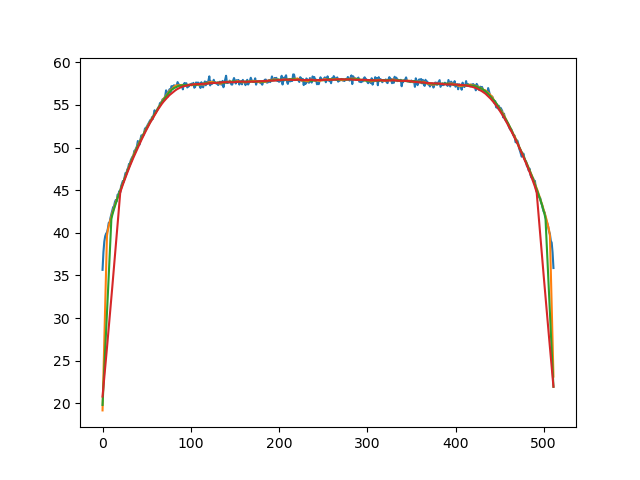

<IPython.core.display.Javascript object>


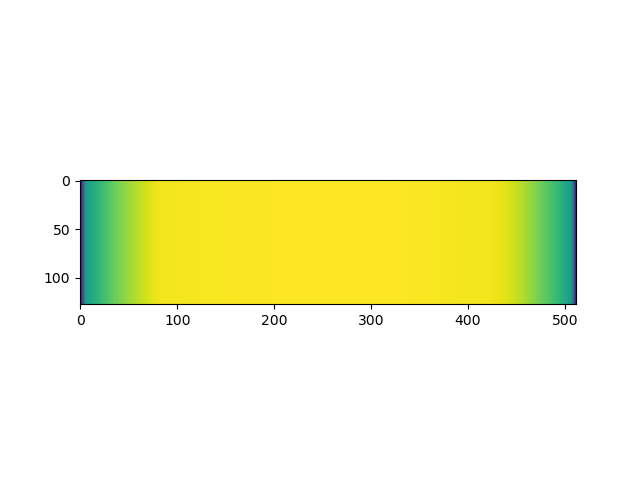

In [2]:
import glob

flood = topas2numpy.BinnedResult('../../topas_sim_cugos/flood_field/Readout_Adipose.csv').data['Sum'].squeeze().T

plt.figure()
plt.plot(np.mean(flood,0))

plt.plot(np.convolve(np.mean(flood,0),10*[0.1],mode='same'))
plt.plot(np.convolve(np.mean(flood,0),20*[0.05],mode='same'))
plt.plot(np.convolve(np.mean(flood,0),40*[0.025],mode='same'))

new_flood = np.convolve(np.mean(flood,0),40*[0.025],mode='same')

new_flood[:106] = np.convolve(np.mean(flood,0),10*[0.1],mode='same')[:106]
new_flood[415:] = np.convolve(np.mean(flood,0),10*[0.1],mode='same')[415:]

plt.figure()
plt.imshow(np.tile(new_flood,[128,1]))

In [3]:
a = np.zeros((512, 64, 2, 16))
b = np.zeros((512,))

In [4]:
np.shape((a.T*b).T)

(512, 64, 2, 16)

In [5]:
file = '../../topas_sim_cugos/Readout_Adipose.csv'

image = -np.log(topas2numpy.BinnedResult(file).data['Sum'].squeeze().T/new_flood)

<IPython.core.display.Javascript object>


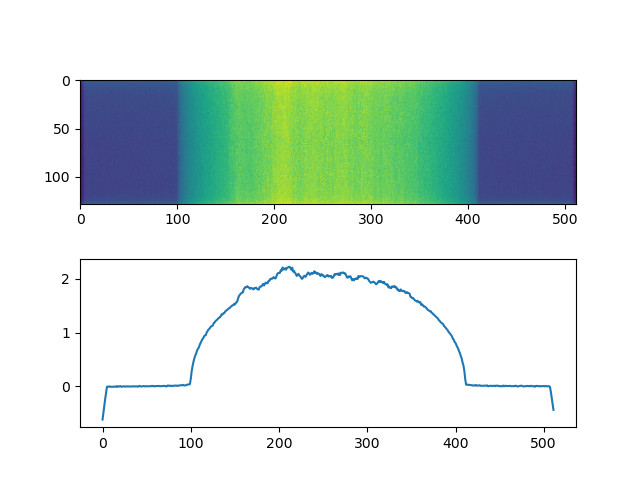

In [6]:
plt.figure()
plt.subplot(211)
plt.imshow(image)
plt.subplot(212)
plt.plot(np.mean(image,0))

In [21]:
fastCat = np.load('/home/xcite/fastCAT/xpecgen/data/projs/C_25_cugos_raw_scatter3.npy')#C_25_CuGOS_projections_smaller.npy')

<IPython.core.display.Javascript object>


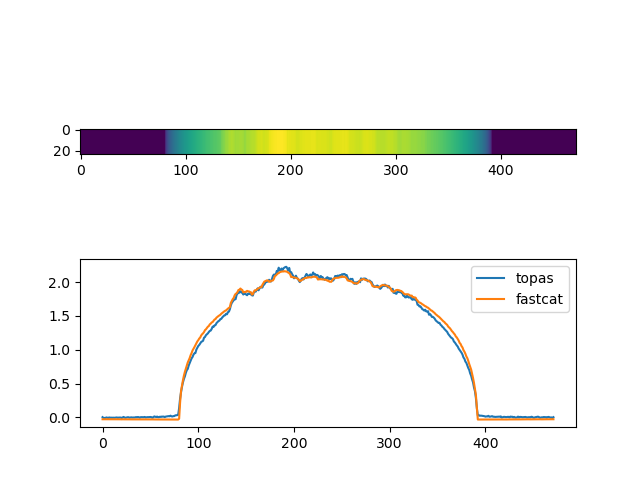

In [22]:
# plt.figure()
# plt.imshow(fastCat[1].T)

imfastcat = fastCat[0]

pad = 20
pad2 = 20

sl = np.mean(image[:,pad:-pad],0)
sl_fc = np.mean(imfastcat[:,pad:-pad],0)

# sl /= np.sum(sl)
# sl_fc /= np.sum(sl_fc)
# sl_fc *= np.sum(sl)

plt.figure()
plt.subplot(211)
plt.imshow(imfastcat[pad2:-pad2,pad:-pad])
plt.subplot(212)
plt.plot(sl)
plt.plot(sl_fc/6.4)
plt.legend(['topas','fastcat'])

## The same thing for the W

<IPython.core.display.Javascript object>


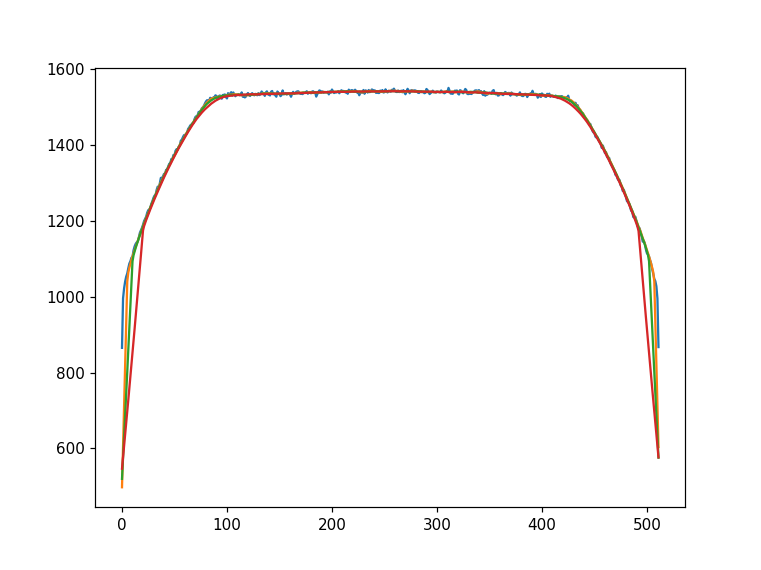

<IPython.core.display.Javascript object>


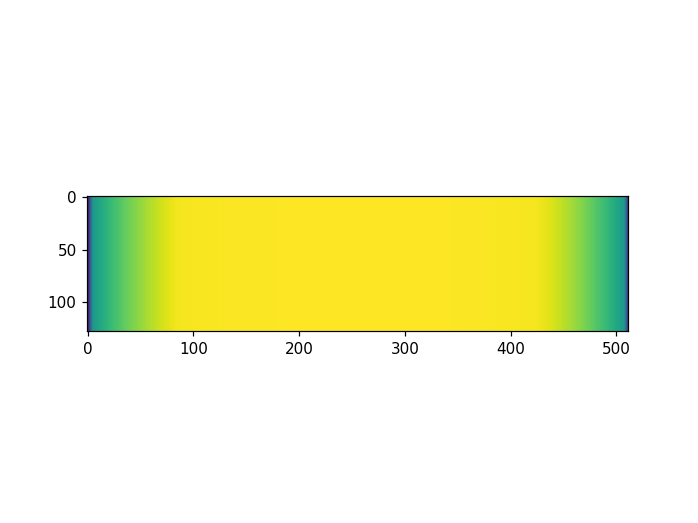

In [203]:
import glob

flood = topas2numpy.BinnedResult('../../Catphan_dose/flood_submission_W/Readout_flood.csv').data['Sum'].squeeze().T

plt.figure()
plt.plot(np.mean(flood,0))

plt.plot(np.convolve(np.mean(flood,0),10*[0.1],mode='same'))
plt.plot(np.convolve(np.mean(flood,0),20*[0.05],mode='same'))
plt.plot(np.convolve(np.mean(flood,0),40*[0.025],mode='same'))

new_flood = np.convolve(np.mean(flood,0),40*[0.025],mode='same')

new_flood[:106] = np.convolve(np.mean(flood,0),10*[0.1],mode='same')[:106]
new_flood[415:] = np.convolve(np.mean(flood,0),10*[0.1],mode='same')[415:]

plt.figure()
plt.imshow(np.tile(new_flood,[128,1]))

file = '../../Catphan_dose/batch_submission_W/Readout_000.csv'

image2 = -np.log(topas2numpy.BinnedResult(file).data['Sum'].squeeze().T/new_flood)


In [204]:
fastCat = np.load('/home/xcite/fastCAT/xpecgen/data/projs/W_6_wextra_scatter3.npy')#C_25_CuGOS_projections_smaller.npy')

<IPython.core.display.Javascript object>


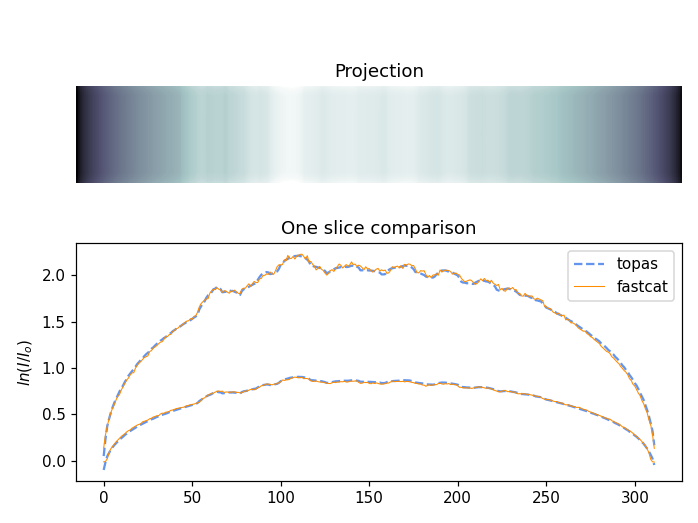

/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
/home/xcite/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


In [222]:
# plt.figure()
# plt.imshow(fastCat[1].T)

imfastcat2 = fastCat[0].T

pad = 100
pad2 = 7

sl2 = np.mean(image2[pad2:-pad2,pad:-pad],0)
sl_fc2 = np.mean(imfastcat2[pad2:-pad2,pad:-pad],0)

# sl2 /= np.sum(sl2)
sl_fc2 /= np.sum(sl_fc2)
sl_fc2 *= np.sum(sl2)

plt.figure()
plt.subplot(211)
plt.title('Projection')
plt.imshow(imfastcat2[pad2:-pad2,pad:-pad],cmap='bone')
plt.axis('off')
plt.subplot(212)
plt.title('One slice comparison')
plt.plot(sl_fc2,'--',color='cornflowerblue')
plt.plot(sl2,color='darkorange',lineWidth= 0.7)
plt.plot(sl_fc,'--',color='cornflowerblue')
plt.plot(sl,color='darkorange',lineWidth= 0.7)
plt.ylabel('$ln (I/I_o)$')
# plt.xlim([50,250])
# plt.ylim([0.0028,0.0044])
plt.legend(['topas','fastcat'])
plt.tight_layout()

In [63]:
import os

data_path = '/home/xcite/fastCAT/xpecgen/data/'

primary = np.load(os.path.join(data_path,'noise','primary_projections.npy')) #TODO: save these as something smaller
noise = np.load(os.path.join(data_path,'noise','noise_projections.npy'))
# np.save('primary_projections',primary)
# sum the noise kernel with the weights
noise_summed = noise.T @ weights_small
# weight the primary
primary_summed = primary.T @ weights_small
# analytical
analytical_summed = np.array(proj).T @ weights_small
# Get a 2d sum
raw_prime = np.mean(np.sum(primary_summed,0),0)
raw_noise = np.mean(np.sum(noise_summed,0),0)
mean_analytical = np.mean(analytical_summed[:,:,0],1)

def get_rmse(x):
    return np.sum(np.abs(np.exp(-mean_analytical/x[0])*x[1] - raw_prime))
def get_rmse_noise(x):
    return np.sum(np.abs(np.exp(-mean_analytical/x[0])*x[1] - raw_noise))

scale = minimize(get_rmse,[10,32])
scale_noise = minimize(get_rmse_noise,[10,32])

raw_proj = np.exp(-mean_analytical/scale.x[0])*scale.x[1]
# get the noise
raw_proj = np.exp(-mean_analytical/scale.x[0])*scale.x[1]
raw_proj_noise = np.exp(-mean_analytical/scale_noise.x[0])*scale_noise.x[1]
scatter = raw_proj_noise - raw_proj

NameError: name 'weights_small' is not defined

<IPython.core.display.Javascript object>


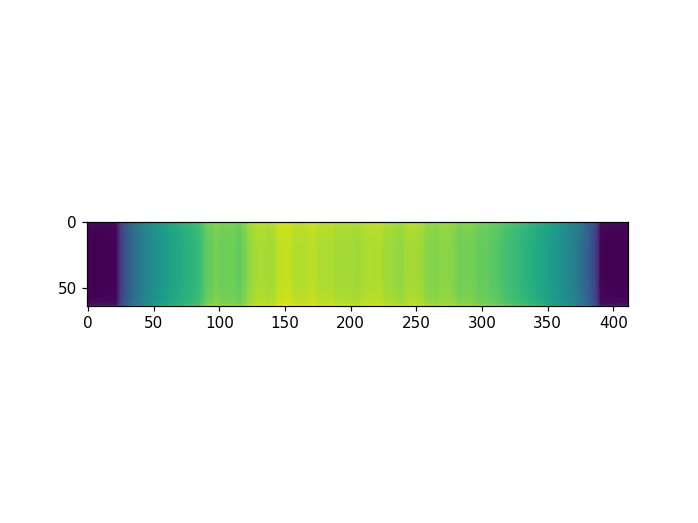

In [23]:
plt.figure()
plt.imshow(imfastcat[:,pad:-pad])